In [8]:
!git clone "https://github.com/Parasgr7/Google-Stock-Price-Prediction.git"

fatal: destination path 'Google-Stock-Price-Prediction' already exists and is not an empty directory.


In [9]:
!ls

Google-Stock-Price-Prediction  sample_data


In [10]:
%cd Google-Stock-Price-Prediction

/content/Google-Stock-Price-Prediction


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
data = pd.read_csv("Google_Stock_Price_Train.csv")

In [13]:
data_year = []
for i, date in enumerate(data.Date):
  data_year.append(date[-4:])

In [14]:
def standardize(x):
  x = x - np.mean(x) 
  x = x / np.std(x)
  return x

In [15]:
data['Year'] = data_year
data['Open'] = standardize(data['Open'])
data.head()

,Date,Open,High,Low,Close,Volume,Year
0,1/3/2012,-1.372855,332.83,324.97,663.59,"7,380,500",2012
1,1/4/2012,-1.333209,333.87,329.08,666.45,"5,749,400",2012
2,1/5/2012,-1.342692,330.75,326.89,657.21,"6,590,300",2012
3,1/6/2012,-1.352505,328.77,323.68,648.24,"5,405,900",2012
4,1/9/2012,-1.393995,322.29,309.46,620.76,"11,688,800",2012


In [16]:
values_30_days = []
value_next_day = []
for year in ['2012', '2013', '2014', '2015']:
  data_open = list(data.loc[data['Year'] == year].Open)
  print(data.loc[data['Year'] == year])
  for i in range(30, len(data_open)-1):
    values_30_days.append(data_open[i-30:i])
    value_next_day.append(data_open[i+1])
values_30_days = np.array(values_30_days)
value_next_day = np.array(value_next_day)

           Date      Open    High     Low   Close      Volume  Year
0      1/3/2012 -1.372855  332.83  324.97  663.59   7,380,500  2012
1      1/4/2012 -1.333209  333.87  329.08  666.45   5,749,400  2012
2      1/5/2012 -1.342692  330.75  326.89  657.21   6,590,300  2012
3      1/6/2012 -1.352505  328.77  323.68  648.24   5,405,900  2012
4      1/9/2012 -1.393995  322.29  309.46  620.76  11,688,800  2012
..          ...       ...     ...     ...     ...         ...   ...
245  12/24/2012 -1.170871  356.25  352.41  707.56   1,688,000  2012
246  12/26/2012 -1.192011  355.11  349.89  706.93   2,373,500  2012
247  12/27/2012 -1.195041  353.10  348.00  704.36   3,307,000  2012
248  12/28/2012 -1.212954  352.14  348.70  698.09   2,814,500  2012
249  12/31/2012 -1.218486  353.96  346.70  705.44   4,009,600  2012

[250 rows x 7 columns]
           Date      Open    High     Low     Close     Volume  Year
250    1/2/2013 -1.154736  362.14  356.94    721.27  5,101,500  2013
251    1/3/2013 -1.136

In [17]:
print(values_30_days.shape)
print(value_next_day.shape)

(882, 30)
(882,)


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(values_30_days, value_next_day, test_size=0.33, random_state=42)

In [19]:
X_train.shape

(590, 30)

In [20]:
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import HeNormal

In [21]:
initializer = HeNormal()

model = Sequential()
model.add(LSTM(30, input_shape = (X_train.shape[1], 1), return_sequences = True, kernel_initializer=initializer, activation = 'relu'))
model.add(LSTM(20, activation = 'relu', return_sequences = True))
model.add(LSTM(10, activation = 'relu', return_sequences = True))
model.add(LSTM(5, activation = 'relu'))
model.add(Dense(1))


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train, Y_train, epochs = 200, validation_data=(X_test, Y_test))

Epoch 1/200
19/19 [==============================] - 7s 92ms/step - loss: 0.4630 - val_loss: 0.2764
Epoch 2/200
19/19 [==============================] - 1s 56ms/step - loss: 0.2013 - val_loss: 0.2175
Epoch 3/200
19/19 [==============================] - 1s 53ms/step - loss: 0.1524 - val_loss: 0.1627
Epoch 4/200
19/19 [==============================] - 1s 51ms/step - loss: 0.0784 - val_loss: 0.0367
Epoch 5/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0311 - val_loss: 0.0393
Epoch 6/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0275 - val_loss: 0.0217
Epoch 7/200
19/19 [==============================] - 1s 51ms/step - loss: 0.0211 - val_loss: 0.0188
Epoch 8/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0190 - val_loss: 0.0179
Epoch 9/200
19/19 [==============================] - 1s 50ms/step - loss: 0.0187 - val_loss: 0.0196
Epoch 10/200
19/19 [==============================] - 1s 52ms/step - loss: 0.0182 - val_loss: 0.0165

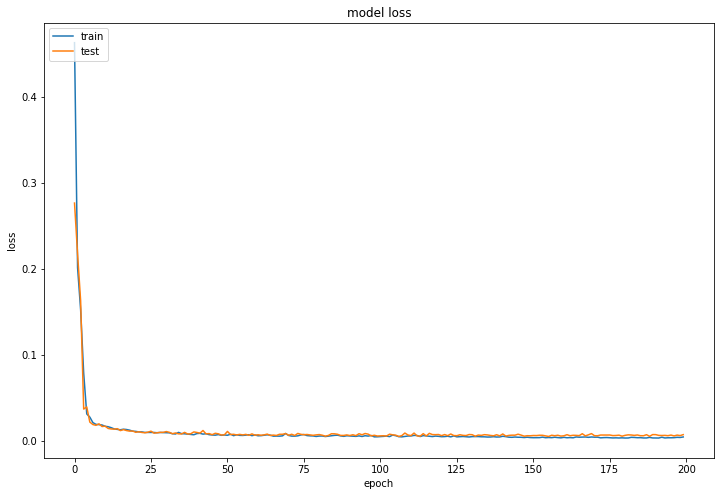

In [28]:
fig = plt.figure(figsize = [12,8])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
values_30_days_for_prediction = []
value_next_day_for_prediction = []
data_open_for_prediction = list(data.loc[data['Year'] == '2016'].Open)
for i in range(30, len(data_open_for_prediction)-1):
    values_30_days_for_prediction.append(data_open_for_prediction[i-30:i])
    value_next_day_for_prediction.append(data_open_for_prediction[i+1])
values_30_days_for_prediction = np.array(values_30_days_for_prediction)
value_next_day_for_prediction = np.array(value_next_day_for_prediction)

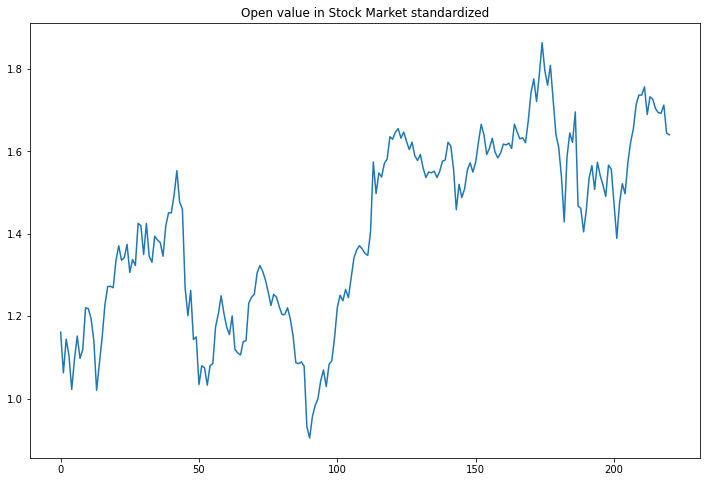

In [30]:
fig = plt.figure(figsize = [12,8])
plt.plot(np.arange(len(value_next_day_for_prediction)), value_next_day_for_prediction)
plt.title("Open value in Stock Market standardized")
plt.show()

In [31]:
predictions = []
for value_30_days in values_30_days_for_prediction:
  pred = model.predict(np.array(value_30_days).reshape(1,30))
  predictions.append(pred[0][0])

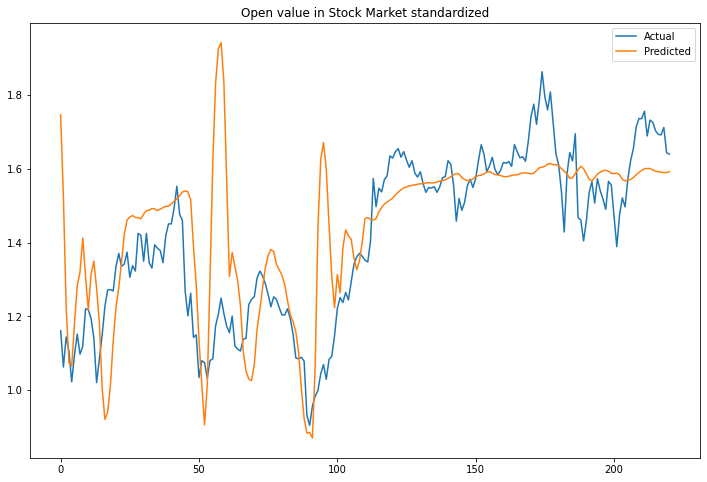

In [32]:
fig = plt.figure(figsize = [12,8])
plt.plot(np.arange(len(value_next_day_for_prediction)), value_next_day_for_prediction, label='Actual')
plt.plot(np.arange(len(predictions)), predictions, label='Predicted')
plt.title("Open value in Stock Market standardized")
plt.legend()
plt.show()